# Customer Segmentation using K-means Clustering

## Importing necessary libraries

In [36]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and viewing the dataset

In [38]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df.shape

(200, 5)

In [40]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [41]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

---

**Checking for null values**

---

In [42]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

---

**Dropping CustomerID column due to irrelevance**

---

In [43]:
df.drop(["CustomerID"], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Data Visualization

### Distribution Plots (histplot)

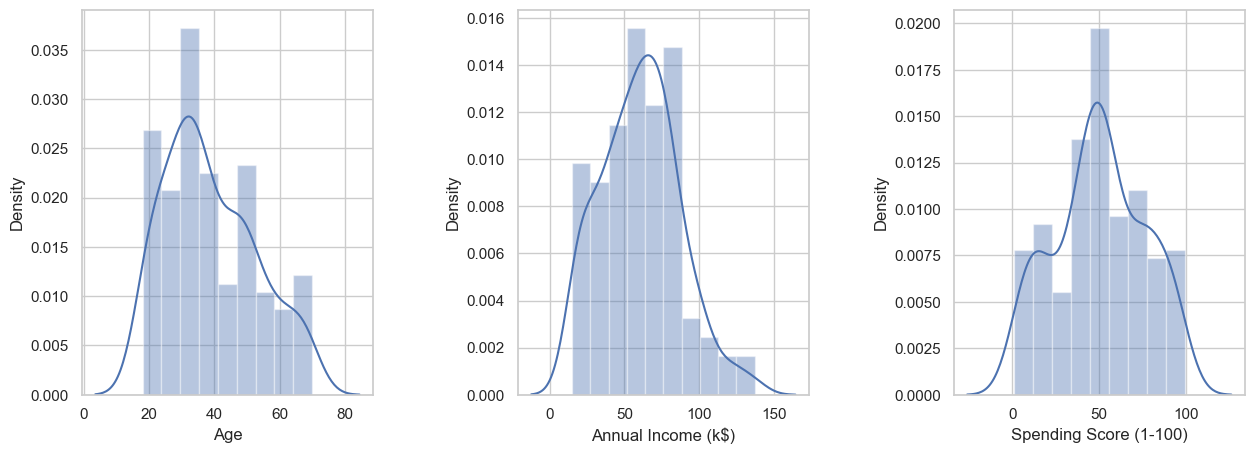

In [44]:
plt.figure(1, figsize=(15, 5))
n=0
for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n+=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.1, wspace=0.5)
    sns.histplot(df[x], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

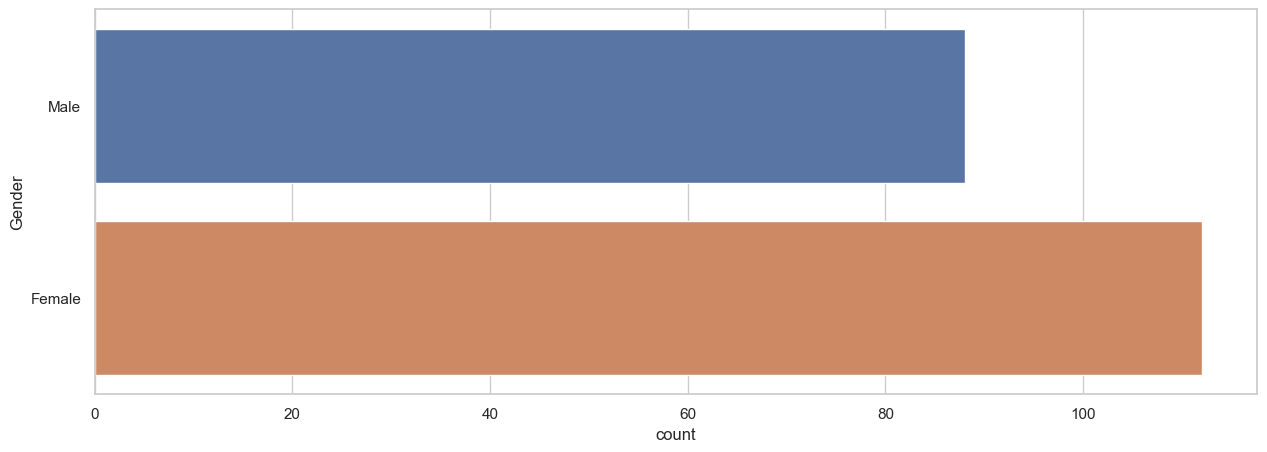

In [45]:
plt.figure(figsize=(15, 5))
sns.countplot(y="Gender", data=df)
plt.show()

### Categorical Plots (violinplot)

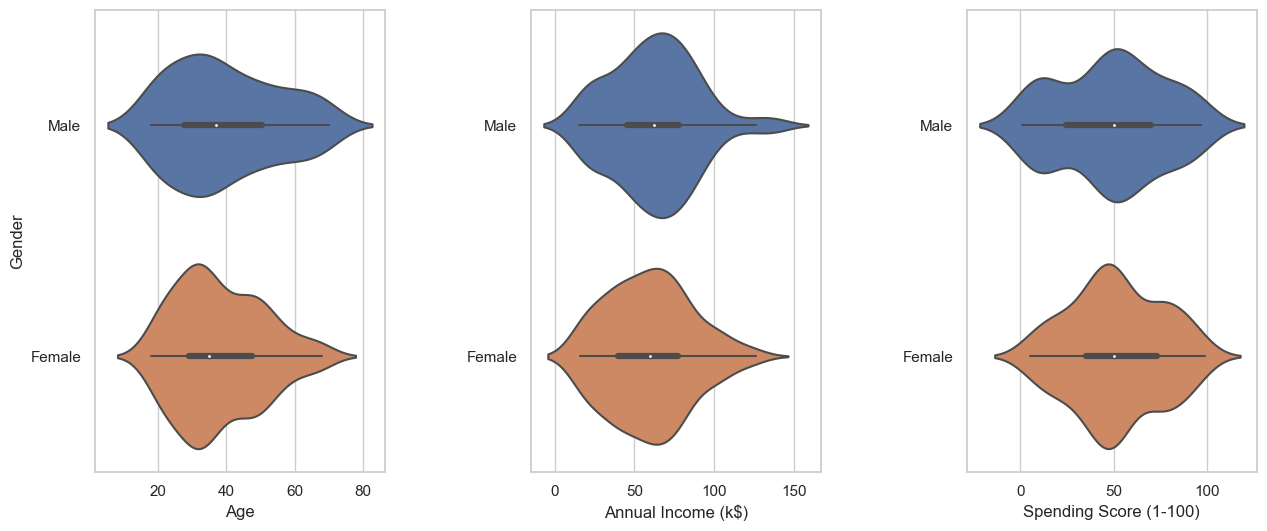

In [46]:
plt.figure(1, figsize=(15, 6))
n=0
for cols in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n+=1
    plt.subplot(1, 3, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.1, wspace=0.5)
    sns.violinplot(x=cols, y="Gender", data=df)
    plt.ylabel("Gender" if n==1 else "")
plt.show()

### Relational Plot (scatterplot)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


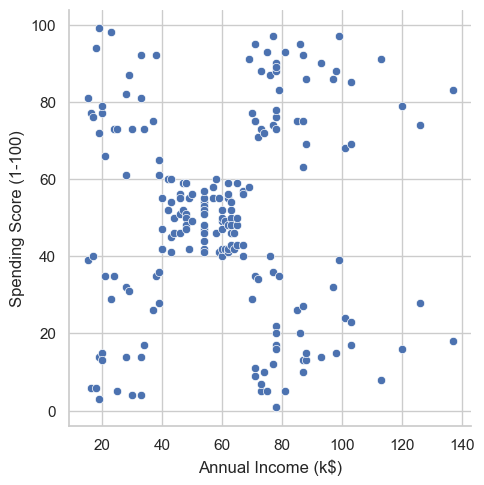

In [47]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

## Finding Optimum No. of Clusters (k)

---

- WCSS is the sum of the squared distance between each point and the centroid in a cluster. As the number of clusters increase, the WCSS value will start to decrease. It will rapidly change at a point that is the optimal no. of clusters.

- K-means++ is a smart centroid initialization method for the K-means algorithm. The goal is to spread out the initial centroid by assigning the first centroid randomly then selecting the rest of the centroids based on the maximum squared distance.

- K-means.inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

### Based on Age and Spending Score

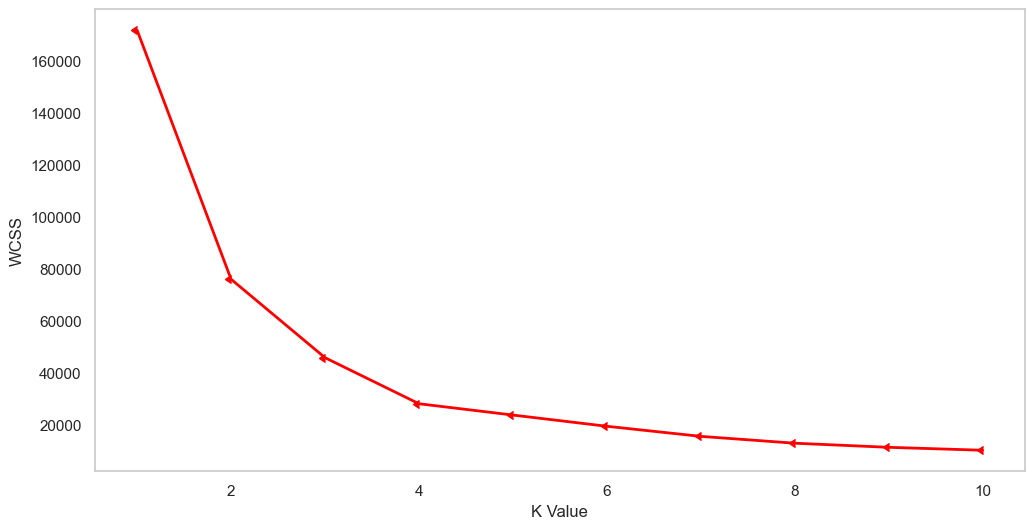

In [48]:
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker=8)
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

### Based on Annual Income and Spending Score

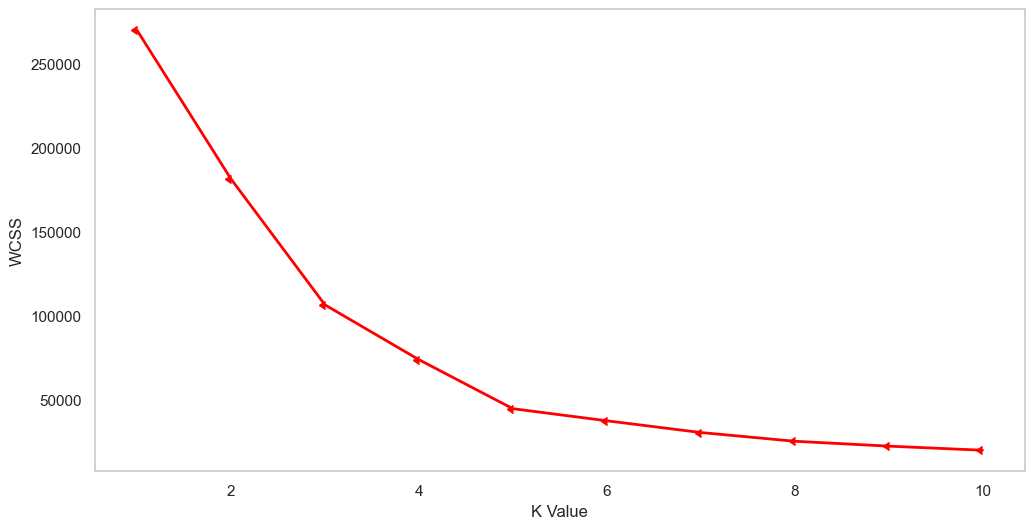

In [49]:
X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker=8)
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

### Based on Age, Annual Income, and Spending Score

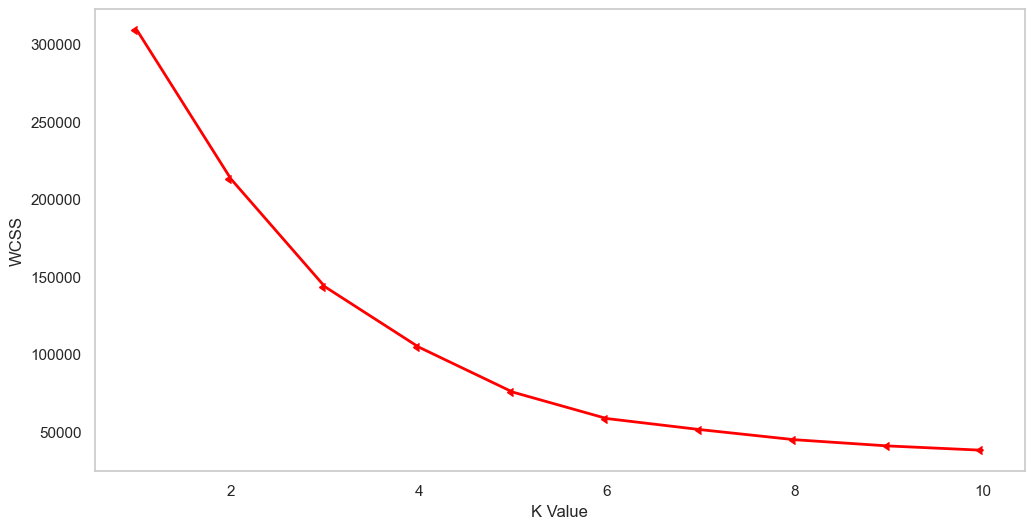

In [50]:
X3 = df.iloc[:, 1:]

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker=8)
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

## Plotting the Clusters using Optimal K

### Based on Age and Spending Score

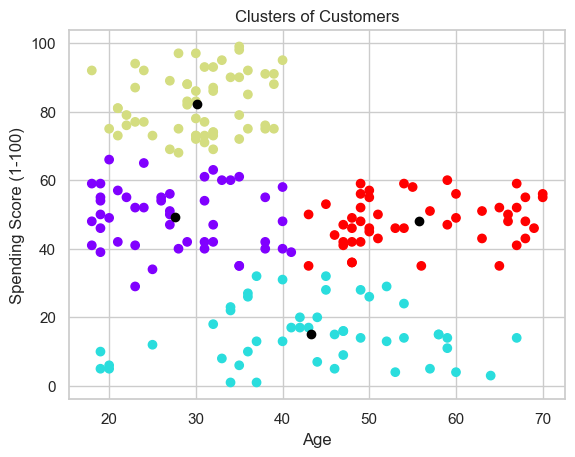

In [51]:
kmeans = KMeans(n_clusters=4, n_init=10)
label = kmeans.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

### Based on Annual Income and Spending Score

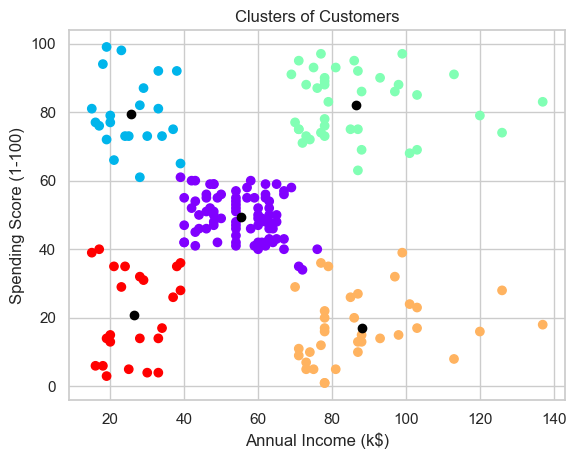

In [52]:
kmeans = KMeans(n_clusters=5, n_init=10)
label = kmeans.fit_predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

### Based on Age, Annual Income, and Spending Score

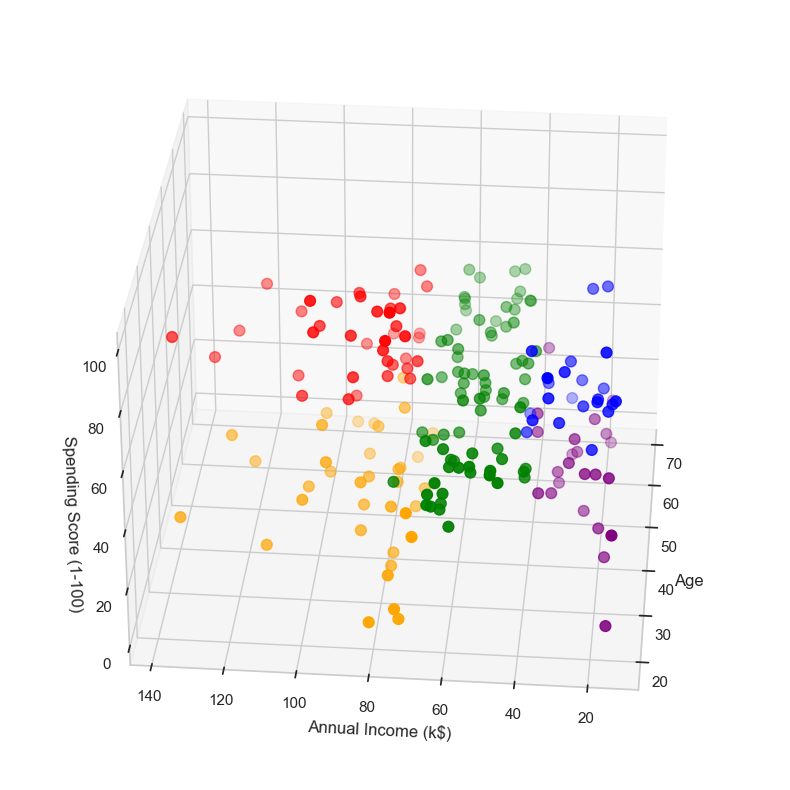

In [53]:
kmeans = KMeans(n_clusters=5, n_init=10)
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c="blue", s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c="red", s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c="green", s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c="orange", s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c="purple", s=60)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()